In [178]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d rumaisa90/suturing-videos
!unzip suturing-videos.zip -d /content/suturing_dataset


Dataset URL: https://www.kaggle.com/datasets/rumaisa90/suturing-videos
License(s): unknown
  0% 0.00/29.4M [00:00<?, ?B/s]
100% 29.4M/29.4M [00:00<00:00, 1.70GB/s]
Archive:  suturing-videos.zip
  inflating: /content/suturing_dataset/data/labels.txt  
  inflating: /content/suturing_dataset/data/videos/Suturing_B001.avi  
  inflating: /content/suturing_dataset/data/videos/Suturing_B002.avi  
  inflating: /content/suturing_dataset/data/videos/Suturing_B003.avi  
  inflating: /content/suturing_dataset/data/videos/Suturing_B004.avi  
  inflating: /content/suturing_dataset/data/videos/Suturing_B005.avi  
  inflating: /content/suturing_dataset/data/videos/Suturing_C001.avi  
  inflating: /content/suturing_dataset/data/videos/Suturing_C002.avi  
  inflating: /content/suturing_dataset/data/videos/Suturing_C003.avi  
  inflating: /content/suturing_dataset/data/videos/Suturing_C004.avi  
  inflating: /content/suturing_dataset/data/videos/Suturing_C005.avi  
  inflating: /content/suturing_dataset/

# **getting the frames**

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bDXdHPqyqagn4ZLczX8n")
project = rf.workspace("starters-3jatr").project("surgical_tool_suturing-jxmyh")
version = project.version(2)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


In [5]:
# Install YOLOv8 and other dependencies
import matplotlib.pyplot as plt

In [6]:
import os
import cv2
import numpy as np
import torch
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [8]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [9]:
import ultralytics
from ultralytics import YOLO

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [11]:
!ls /content/surgical_tool_suturing-2


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!python train.py \
  --weights /content/instrument_detector_model.pt \
  --data /content/surgical_tool_suturing-2/data.yaml \
  --epochs 50 \
  --batch-size 16 \
  --img 640 \
  --project runs/train \
  --name finetuned_instruments \
  --exist-ok


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-11-06 09:09:30.772074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762420170.792567    5286 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762420170.798536    5286 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762420170.813806    5286 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762420170.813829    5286 computation_placer.cc:177] computation placer already registere

In [12]:
!ls runs/train/*/weights/


best.pt  last.pt


In [13]:
!python val.py \
  --weights runs/train/finetuned_instruments/weights/best.pt \
  --data /content/surgical_tool_suturing-2/data.yaml


val: data=/content/surgical_tool_suturing-2/data.yaml, weights=['runs/train/finetuned_instruments/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-446-ga53364d6 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
val: Scanning /content/surgical_tool_suturing-2/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100% 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:02<00:00,  1.33s/it]
                   all         45         87      0.977      0.989      0.985      0.609
Speed: 1.0ms pre-process, 29.0ms inference, 3.2ms NMS per image at s

In [ ]:
!zip -r /content/finetuned_instruments.zip /content/yolov5/runs/train/finetuned_instruments


  adding: content/yolov5/runs/train/finetuned_instruments/ (stored 0%)
  adding: content/yolov5/runs/train/finetuned_instruments/train_batch0.jpg (deflated 4%)
  adding: content/yolov5/runs/train/finetuned_instruments/train_batch1.jpg (deflated 4%)
  adding: content/yolov5/runs/train/finetuned_instruments/val_batch0_pred.jpg (deflated 11%)
  adding: content/yolov5/runs/train/finetuned_instruments/train_batch2.jpg (deflated 3%)
  adding: content/yolov5/runs/train/finetuned_instruments/confusion_matrix.png (deflated 40%)
  adding: content/yolov5/runs/train/finetuned_instruments/events.out.tfevents.1762419782.5558386373f1.3023.0 (deflated 9%)
  adding: content/yolov5/runs/train/finetuned_instruments/P_curve.png (deflated 23%)
  adding: content/yolov5/runs/train/finetuned_instruments/events.out.tfevents.1762419994.5558386373f1.4472.0 (deflated 9%)
  adding: content/yolov5/runs/train/finetuned_instruments/results.png (deflated 9%)
  adding: content/yolov5/runs/train/finetuned_instruments/op

In [ ]:
%cd /content/yolov5

/content/yolov5


In [14]:
import torch
from yolov5.models.common import DetectMultiBackend
from yolov5.utils.torch_utils import select_device

device = select_device('0')  # use GPU if available
model_path = "/content/yolov5/runs/train/finetuned_instruments/weights/best.pt"

model = DetectMultiBackend(model_path, device=device)
model.eval()  # set to evaluation mode
names = model.names  # class names
print(names)

YOLOv5 🚀 v7.0-446-ga53364d6 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs


{0: 'tool'}


In [15]:
def read_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError(f"Cannot open video: {video_path}")
    fps = cap.get(cv2.CAP_PROP_FPS) or 30.0
    return cap, fps

In [16]:
def get_frame_rgb(cap):
    ret, frame = cap.read()
    if not ret:
        return None
    return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

Detections: [[      408.6      328.72      641.14      482.01      0.9072           0]
 [     1.1067      185.28      257.48      316.56      0.8428           0]]


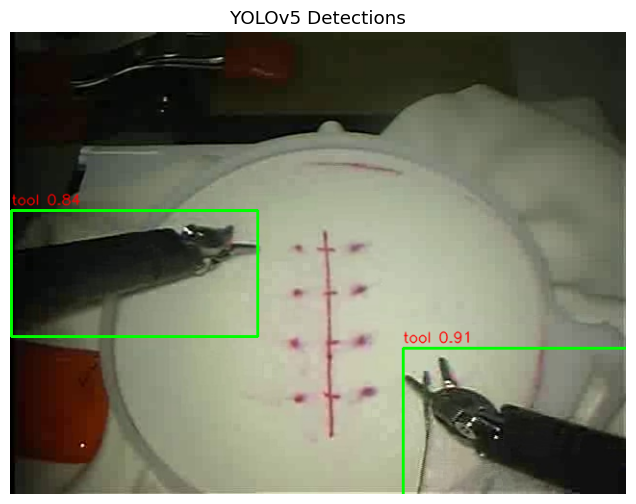

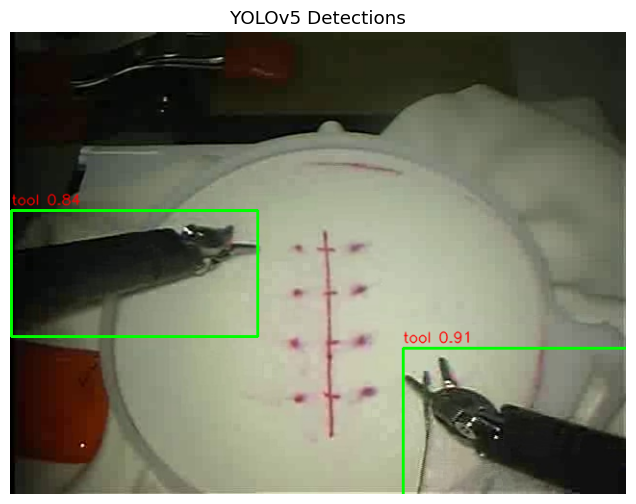

In [19]:
%matplotlib inline
from yolov5.utils.general import non_max_suppression
def detect_objects(frame_rgb, model, conf_threshold=0.25):
    """Run inference and return Nx6 array [x1,y1,x2,y2,conf,cls]"""
    img = np.ascontiguousarray(frame_rgb)
    img_tensor = torch.from_numpy(img).permute(2,0,1).float().unsqueeze(0) / 255.0
    img_tensor = img_tensor.to(model.device)
    if getattr(model, 'fp16', False):
        img_tensor = img_tensor.half()

    with torch.no_grad():
        pred = model(img_tensor)
        pred = non_max_suppression(pred, conf_threshold, 0.45)

    if len(pred) == 0 or pred[0] is None or pred[0].numel() == 0:
        return np.zeros((0,6))

    return pred[0].cpu().numpy()

def draw_boxes(frame_rgb, det):
    """Draw boxes on RGB frame using Matplotlib-friendly colors"""
    img = frame_rgb.copy()
    for row in det:
        x1, y1, x2, y2, conf, cls = row
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cls_name = model.names[int(cls)] if int(cls) in model.names else str(int(cls))
        cv2.putText(img, f"{cls_name} {conf:.2f}", (x1, y1-6),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_AA)
    return img

# ---------------------------
# 3️⃣ Run on a single image
# ---------------------------
img_path = "/content/frame_0085.jpg"
frame = cv2.imread(img_path)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

det = detect_objects(frame_rgb, model, conf_threshold=0.1)
print("Detections:", det)

img_boxes = draw_boxes(frame_rgb, det)

# Display using matplotlib
plt.figure(figsize=(10,6))
plt.imshow(img_boxes)  # RGB image
plt.axis('off')
plt.title("YOLOv5 Detections")
plt.show()


In [20]:
def compute_center(boxes):
    """
    boxes: Nx4 (x1,y1,x2,y2) or Nx6 (x1,y1,x2,y2,conf,cls)
    return mean center [cx, cy] or None if no boxes
    """
    if boxes is None or len(boxes) == 0:
        return None
    boxes_xy = boxes[:, :4]
    centers = np.stack([ ( (b[0]+b[2])/2.0, (b[1]+b[3])/2.0 ) for b in boxes_xy ])
    return np.mean(centers, axis=0)



In [21]:
def compute_motion_metrics(motion_magnitude, frame_count, fps):
    if len(motion_magnitude) == 0:
        return 0.0, frame_count / (fps or 1.0), 0.0
    how_far = float(np.mean(motion_magnitude))
    how_long = float(frame_count / (fps or 1.0))
    how_steady = float(1.0 / (np.std(motion_magnitude) + 1e-8))
    return how_far, how_long, how_steady


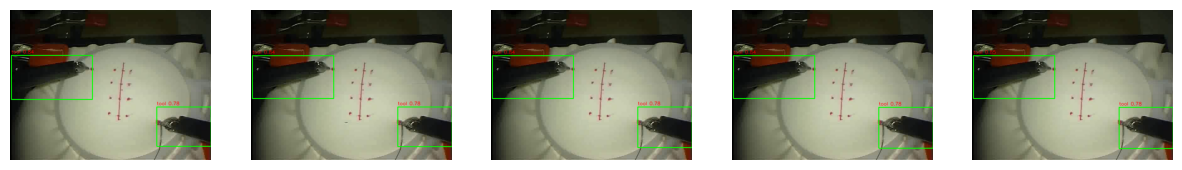

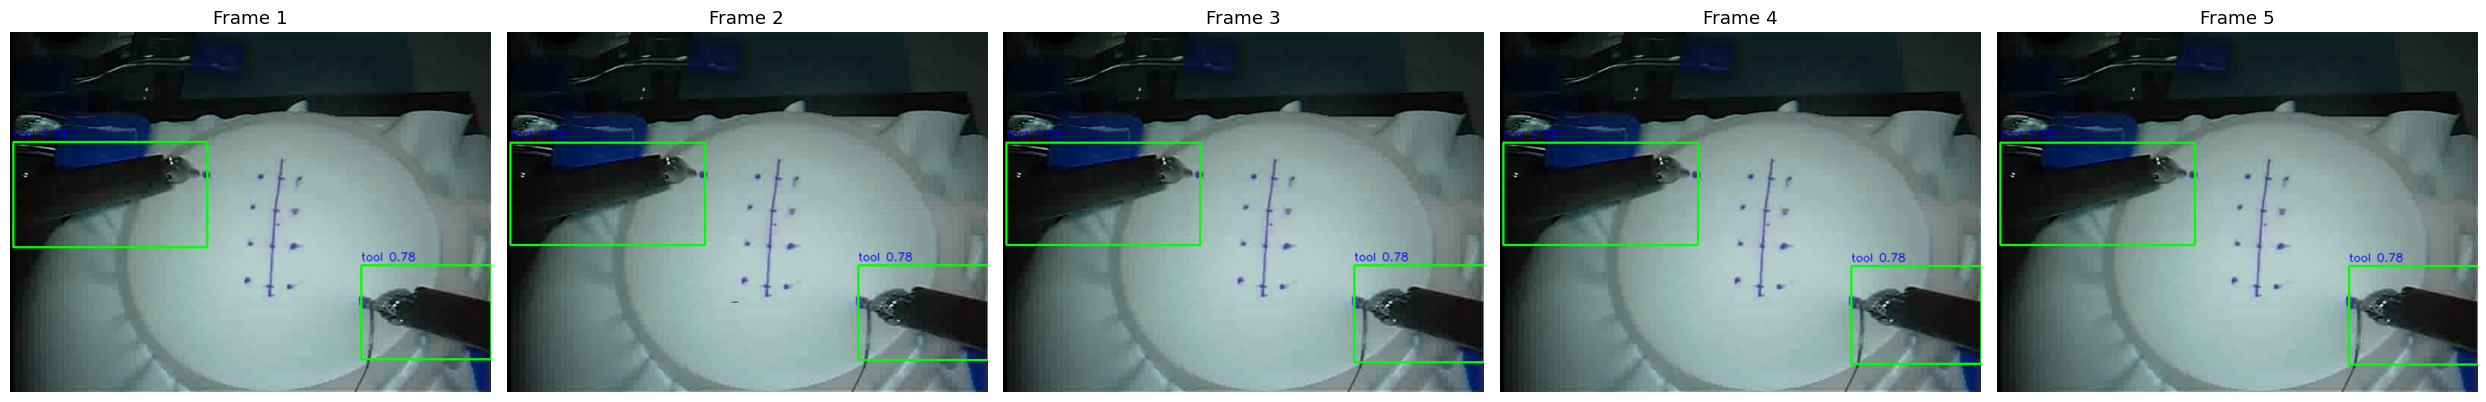

In [22]:
sample_images = []
def process_video(video_path, model, conf_threshold=0.25, frame_skip=5, show_examples=3):
    cap, fps = read_video(video_path)
    prev_center = None
    motion_magnitude = []
    frame_count = 0
    sample_images = []
    shown = 0
    show_examples = 5


    while True:
        frame_rgb = get_frame_rgb(cap)
        if frame_rgb is None:
            break
        frame_count += 1
        if frame_count % frame_skip != 0:
            continue

        det = detect_objects(frame_rgb, model, conf_threshold=conf_threshold)
        # det: Nx6 numpy array [x1,y1,x2,y2,conf,cls]
        if det.shape[0] > 0:
            curr_center = compute_center(det)
        else:
            curr_center = None

        # store example render images for first few detections
        if shown < show_examples:
          disp = frame_rgb.copy()
          for row in det:
              x1, y1, x2, y2, conf, cls = row
              cv2.rectangle(disp, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
              cls_name = model.names[int(cls)] if int(cls) in model.names else str(int(cls))
              cv2.putText(disp, f"{cls_name} {conf:.2f}", (int(x1), int(y1)-6),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_AA)

          sample_images.append(cv2.cvtColor(disp, cv2.COLOR_RGB2BGR))  # convert for display
          shown += 1


        if curr_center is not None and prev_center is not None:
            dist = float(np.linalg.norm(curr_center - prev_center))
            motion_magnitude.append(dist)

        if curr_center is not None:
            prev_center = curr_center
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(sample_images):
        plt.subplot(1, len(sample_images), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
    plt.show()

    cap.release()
    how_far, how_long, how_steady = compute_motion_metrics(motion_magnitude, frame_count, fps)

    return how_far, how_long, how_steady, sample_images

import matplotlib.pyplot as plt
import cv2

# Call your function (it just returns frames, no plotting inside)
how_far, how_long, how_steady, sample_images = process_video(
    "/content/suturing_dataset/data/videos/Suturing_B001.avi", model
)

# Ensure we have at least one image
if len(sample_images) == 0:
    print("No sample images to display.")
else:
    n = len(sample_images)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:
        axes = [axes]  # Make iterable if only one image
    for ax, img, i in zip(axes, sample_images, range(n)):
        # img should already be RGB
        ax.imshow(img)
        ax.set_title(f"Frame {i+1}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()


In [23]:
def find_video_file(video_dir, base_name):
    for ext in [".mp4", ".avi", ".mov", ".MTS", ".mkv"]:
        candidate = os.path.join(video_dir, base_name + ext)
        if os.path.exists(candidate):
            return candidate
    # try full filename match
    candidate = os.path.join(video_dir, base_name)
    if os.path.exists(candidate):
        return candidate
    return None

In [24]:
def analyze_dataset(video_dir, count, label_file):
    # read label file: accept CSV or txt with two columns: filename,score
    if label_file.lower().endswith(".txt") or label_file.lower().endswith(".csv"):
        df_labels = pd.read_csv(label_file, sep=None, engine='python', header=None, names=["filename","score"])
    else:
        df_labels = pd.read_csv(label_file)

    df_labels = df_labels.head(count)
    metrics = []
    print(f"\nProcessing {len(df_labels)} videos...\n")

    for _, row in tqdm(df_labels.iterrows(), total=len(df_labels)):
        base_name = str(row["filename"]).strip()
        vid_path = find_video_file(video_dir, base_name)
        if not vid_path:
            print(f"Missing video for: {base_name}")
            continue
        how_far, how_long, how_steady, samples = process_video(vid_path, model,
                                                               conf_threshold=0.95,
                                                               frame_skip=5,
                                                               show_examples=3)
        metrics.append({
            "filename": os.path.basename(vid_path),
            "how_far": how_far,
            "how_long": how_long,
            "how_steady": how_steady,
            "score": float(row["score"])
        })

    df_metrics = pd.DataFrame(metrics)
    df_metrics.to_csv("metrics_and_labels.csv", index=False)
    print("\nSaved metrics_and_labels.csv")
    return df_metrics

In [25]:
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings


Processing 10 videos...



  0%|          | 0/10 [00:00<?, ?it/s]

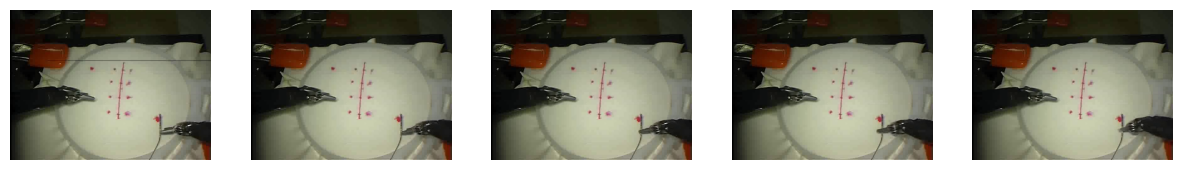

 10%|█         | 1/10 [00:20<03:03, 20.41s/it]

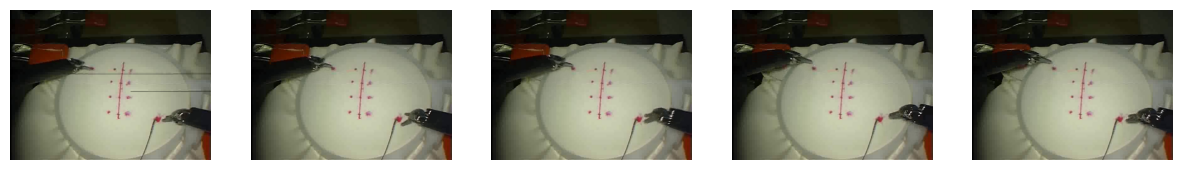

 20%|██        | 2/10 [00:40<02:41, 20.24s/it]

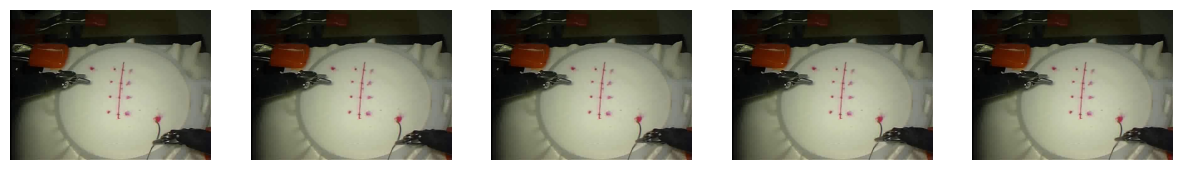

 30%|███       | 3/10 [00:59<02:17, 19.63s/it]

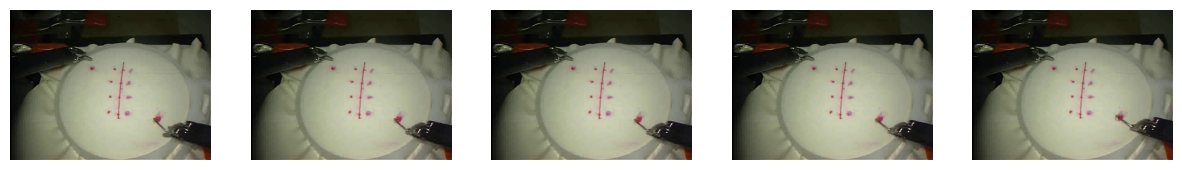

 40%|████      | 4/10 [01:15<01:50, 18.35s/it]

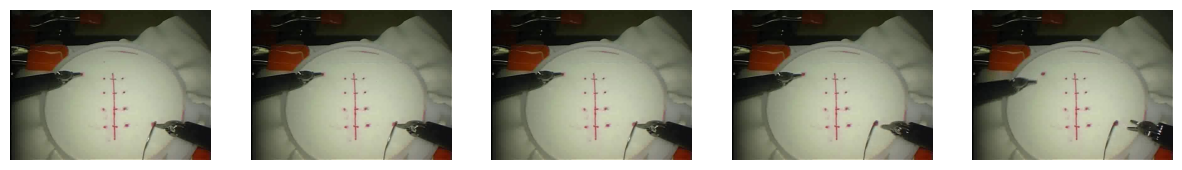

 50%|█████     | 5/10 [01:34<01:31, 18.37s/it]

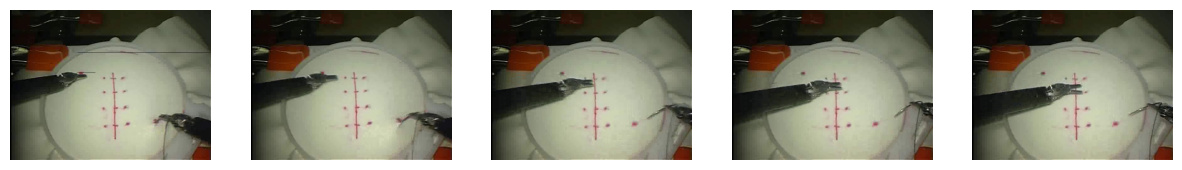

 60%|██████    | 6/10 [01:54<01:16, 19.06s/it]

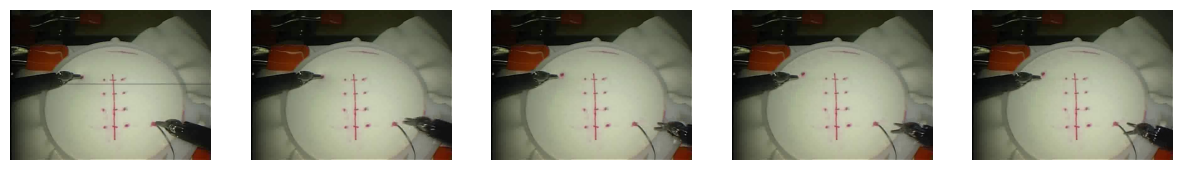

 70%|███████   | 7/10 [02:13<00:56, 18.92s/it]

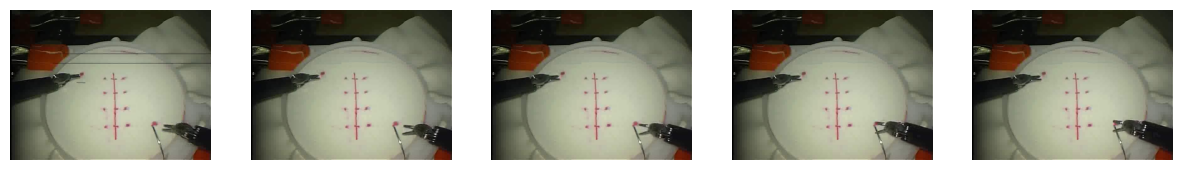

 80%|████████  | 8/10 [02:29<00:35, 17.91s/it]

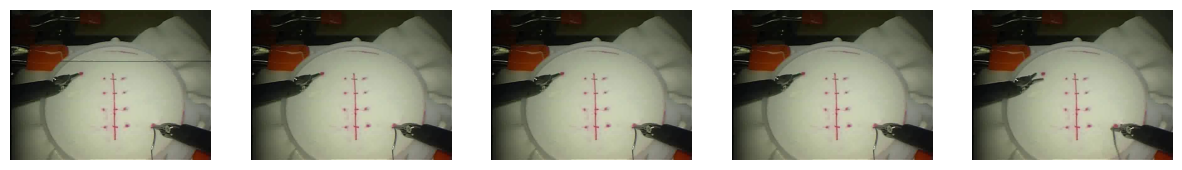

 90%|█████████ | 9/10 [02:44<00:17, 17.03s/it]

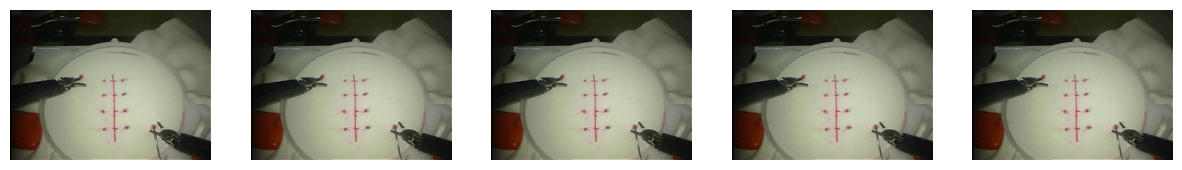

100%|██████████| 10/10 [03:00<00:00, 18.04s/it]



Saved metrics_and_labels.csv

Spearman correlations:
   how_far: ρ = nan, p = nan
  how_long: ρ = -0.2446586144725246, p = 0.4957104969637889
how_steady: ρ = nan, p = nan


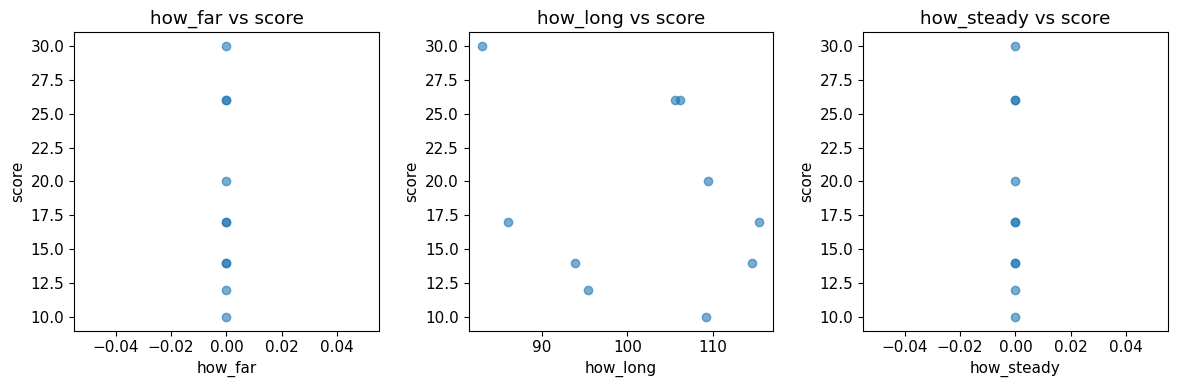

In [26]:
df_metrics = analyze_dataset("/content/suturing_dataset/data/videos", 10, "/content/suturing_dataset/data/labels.txt")

# Plotting and Spearman correlation (safe handling of constant columns)
if df_metrics.shape[0] > 0:
    print("\nSpearman correlations:")
    plt.figure(figsize=(12,4))
    for i, metric in enumerate(["how_far","how_long","how_steady"], 1):
        vals = df_metrics[metric].values
        scores = df_metrics["score"].values
        # handle constant arrays
        try:
            rho, pval = spearmanr(vals, scores)
        except Exception as e:
            print("Exception")
            rho, pval = np.nan, np.nan
        print(f"{metric:>10}: ρ = {rho}, p = {pval}")
        plt.subplot(1,3,i)
        plt.scatter(vals, scores, alpha=0.6)
        plt.xlabel(metric); plt.ylabel("score")
        plt.title(f"{metric} vs score")
    plt.tight_layout()
    plt.show()
else:
    print("No metrics to plot (no videos processed).")

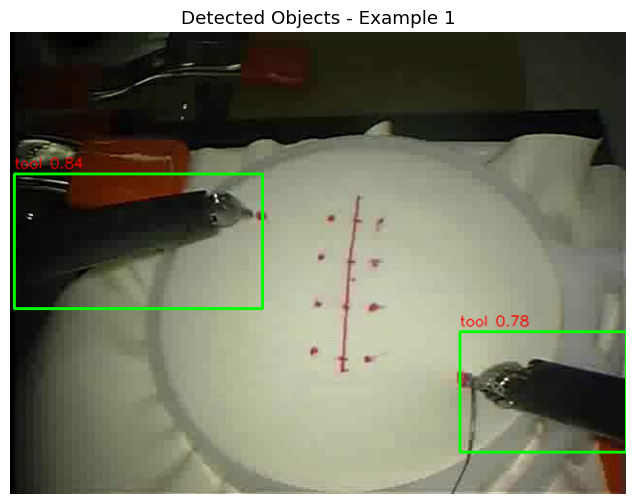

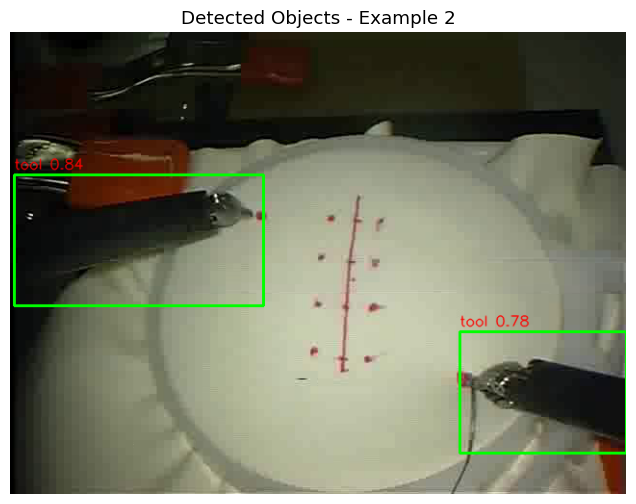

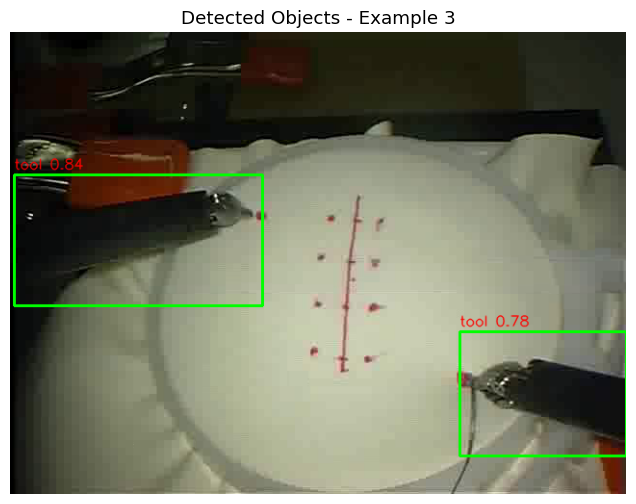

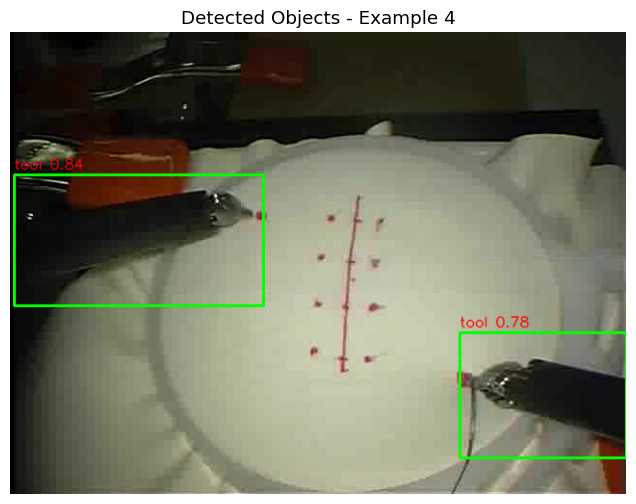

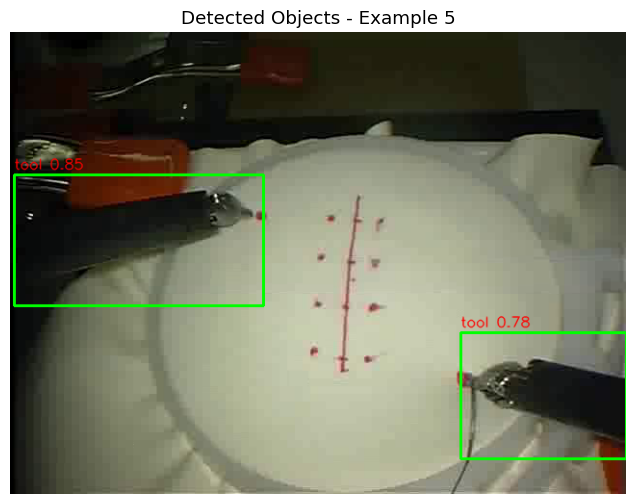

In [27]:
for i, img in enumerate(sample_images):
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Detected Objects - Example {i+1}")
    plt.show()